<div style="text-align:center"><span style="font-size:1em;"> 
<font color=black size=6 face=雅黑>BiliBili百大up主成因分析</font>
</span> </div>

<div style="text-align:center"><span style="font-size:1em;"> 
经济与金融学院 应用统计 王延京 3120319059
</span> </div>

<div style="text-align:center"><span style="font-size:1em;"> 
2021/01/15
</span> </div>

        随着综合类视频自媒体行业的崛起，哔哩哔哩作为国内知名的UCG视频网站，平台上活跃着数以百万计的综合类视频内容创作者。我们将这些人亲切地称为B站UP主。每年，哔哩哔哩官方都会评选平台百大UP主，究竟是什么因素让这100名内容创作者能够脱颖而出？本文基于自动化测试模块（selenium）于哔哩哔哩官网爬取了965名粉丝超过5万的UP主的关注人数、粉丝人数、获赞数、播放总量、生日、投稿数等多个属性。基于描述性统计方法，对百大up主成因分析作出简单分析。

## 一、数据的爬取

        爬虫程序的主要思路是运用自动化测试模块（selenium）模拟人的操作行为，运用时间模块（time）和数值运算模块（numpy）设置操作间隔避免被反扒程序甄别最后使用数据清洗模块（re）和CSV读写模块（CSV）以列表的形式返回UP主的UID并且写入CSV文件中进而进行进一步的数据分析。

In [ ]:
# -*- coding: UTF-8 -*-

import selenium.webdriver as wb  # 爬虫框架/自动化测试框架
import time  # 随机休眠，防止反爬机制
import numpy as np  # 处理数组用
import csv  # 处理数据，存储和读取CSV文件
import re  # 正则表达式


def init_csv(filepath='test.csv'):
    headers = ['UP昵称', '会员等级', '会员类别', '关注', '粉丝', '获赞', '播放', '生日', '投稿']#最后文件的标题行
    with open(filepath, 'w', newline='', encoding='utf-8')as f:#w指直接写入
        f_csv = csv.writer(f)
        f_csv.writerow(headers)#创建文件，写入标题行


def write_csv(filepath, datas):
    with open(filepath, 'a+', newline='', encoding='utf-8')as f:#
        f_csv = csv.writer(f)
        f_csv.writerow(datas)#每爬取一行数据就写入


def read_uid(filepath):
    x = []
    with open(filepath, 'r', newline='', encoding='utf-8')as f:
        csv_read = csv.reader(f)
        for line in csv_read:
            line[0] = re.findall('\d+', line[0])[0]#正则化处理
            x.append(line[0])
    return x


class Spider(object):#定义一个爬虫类

    def __init__(self, display=True) -> None:
        super().__init__()
        option = wb.ChromeOptions()
        # 忽略driver自身的警告|错误等输出
        option.add_experimental_option(
            'excludeSwitches', ['enable-logging'])
        # 禁用图片加载,加速爬取url等页面数据,图片数据待爬取url后由requests库实现
        # option.add_experimental_option(
        #     'prefs', {"profile.managed_default_content_settings.images": 2})
        if display == False:
            option.headless = True
            print('程序运行，设置为无窗口模式')

        ################    Chrome程序地址
        option.binary_location = r"C:\Users\lenovo\AppData\Local\Google\Chrome\Application\chrome.exe"
        # 浏览器驱动器初始化，需指明路径与参数
        ################    Chrome驱动器地址改这里，改try里的那个就行
        self.driver = wb.Chrome(r"D:\Chromedriver\chromedriver.exe", options=option)

    def login(self):
        self.driver.get('https://space.bilibili.com/' + '51896064')
        self.random_sleep(2)
        login_elm = self.driver.find_element_by_css_selector(
            '#internationalHeader > div > div > div.nav-user-center > div.user-con.logout > div:nth-child(1) > div > span > div > span')
        #找到登陆按钮的元素
        login_elm.click()#要求点击
        wds = self.driver.window_handles#点击之后弹出到一个新的网页
        self.driver.switch_to.window(wds[-1])#返回到上一个网页
        self.random_sleep(2)
        username_elm: wb.remote.webdriver.WebElement = self.driver.find_element_by_css_selector(
            '#login-username')
        password_elm: wb.remote.webdriver.WebElement = self.driver.find_element_by_css_selector(
            '#login-passwd')
        login2_elm: wb.remote.webdriver.WebElement = self.driver.find_element_by_css_selector(
            '#geetest-wrap > div > div.btn-box > a.btn.btn-login')#登录界面的登陆按钮

        ################################
        # 账号密码改这里
        username_elm.send_keys('15029220381')#输入账号
        password_elm.send_keys('g123456')#输入密码
        self.random_sleep(1)
        login2_elm.click()
        # 8秒的时间进行人机结合登录=_=
        time.sleep(12)

    def random_sleep(self, delay=3):
        tmp = np.random.random()#随机数0-1
        time.sleep(delay * (tmp + 0.5))#每爬一个网页随机暂停几秒

    def fetch_by_UID(self, UID='51896064'):
        self.driver.get('https://space.bilibili.com/' + UID)
        self.random_sleep(3)

        up_name_elm = self.driver.find_element_by_css_selector('#h-name')
        print(up_name_elm.text)
        up_name = up_name_elm.text

        up_level_elm: wb.remote.webdriver.WebElement = self.driver.find_element_by_css_selector(
            '#app > div.h > div.wrapper > div.h-inner > div.h-user > div > div.h-basic > div:nth-child(1) > a.h-level.m-level')
        print(up_level_elm.get_attribute('lvl'))
        up_level = up_level_elm.get_attribute('lvl')

        up_member_elm = self.driver.find_element_by_css_selector(
            '#app > div.h > div.wrapper > div.h-inner > div.h-user > div > div.h-basic > div:nth-child(1) > a.h-vipType')
        print(up_member_elm.text)
        up_member = up_member_elm.text

        up_follow_elm = self.driver.find_element_by_css_selector('#n-gz')
        print(up_follow_elm.text)
        up_follow = up_follow_elm.text

        up_followby_elm = self.driver.find_element_by_css_selector('#n-fs')
        print(up_followby_elm.text)
        up_followby = up_followby_elm.text

        up_getzan_elm = self.driver.find_element_by_css_selector('#n-bf')
        print(up_getzan_elm.text)
        up_getzan = up_getzan_elm.text
        
        up_numofplay_elm = self.driver.find_element_by_xpath(
            '/html/body/div[2]/div[2]/div/div[1]/div[3]/div[2]/p[2]')
        print(up_numofplay_elm.text)
        up_numofplay = up_numofplay_elm.text

        birthday = 'None'
        try:
            birthday = self.driver.find_element_by_css_selector(
                '#page-index > div.col-2 > div.section.user > div.info > div.content > div > div > div.item.birthday > span.text').text
        except:
            pass
        print(birthday)

        up_tougao_elm = self.driver.find_element_by_css_selector(
            '#navigator > div > div.n-inner.clearfix > div.n-tab-links > a.n-btn.n-video.n-audio.n-article.n-album > span.n-num').text
        tougao = up_tougao_elm
        xiangbu = 'Error'
        try:
            up_tougao_elm = self.driver.find_element_by_xpath(
                '//*[@id="navigator"]/div/div[1]/div[1]/a[3]/span[2]')
            up_tougao_elm.click()
            self.random_sleep(3)
            up_xiangbu_elm = self.driver.find_element_by_css_selector(
                '#page-video > div > div.contribution-sidenav > div > div > ul > li:nth-child(4) > span')
            xiangbu = up_xiangbu_elm.text
        except:
            pass
        if xiangbu != 'Error':
            tougao = str(int(tougao) - int(xiangbu))
        print(tougao)
        self.random_sleep(2)
        return (up_name, up_level, up_member, up_follow, up_followby, up_getzan, up_numofplay, birthday, tougao)


if __name__ == "__main__":#从此开始执行
    # 用来保存爬虫结果的文件是下面这个，可以不新建
    csv_path = r'.\bilibli_ups3.csv'
    # 用来读取UID列表的csv文件是这个，excel要先另存为成csv，并且不要有标题行
    uid_path = r'.\UIDall.csv'
    uid_list = read_uid(uid_path)#返回成一个列表
    worker = Spider(display=True)#spider是前面定义的一个爬虫类
    try:
        worker.login()
    except:
        print('登录失败')
        time.sleep(10)
        exit()

    try:
        init_csv(csv_path)#执行初始化CSV的函数
    except:
        pass

    for i in range(len(uid_list)):
        try:
            write_csv(csv_path, worker.fetch_by_UID(uid_list[i]))
            print('*' * 20 + '\n', i, 'success')
        except:
            print(i, 'error')
    time.sleep(10)
    # worker.random_sleep()

## 二、数据分析

        经过数据爬取，共获得965名粉丝数量超过五万的UP的六项指标，结合近期发布的哔哩哔哩百大UP主名单，本文就百大UP的成因做一个简单的描述性统计分析。

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np #载入描述性统计常用的模块

In [2]:
#载入数据
data=pd.read_csv(r'bilibli_ups3.csv')
baida2020=pd.read_csv(r'baida.csv',encoding='gbk')

In [3]:
#给初始的数据集增加一列分别用0和1分别表示该UP主是否为2020年哔哩哔哩官方评定的百大UP主
list_baidaornot=[]
list_baida=list(baida2020['百大'])
for i in data['UP昵称']:
    if i in list_baida:
        list_baidaornot.append(1)
    else:
        list_baidaornot.append(0)
data.insert(1,'是否为2020年百大UP主',list_baidaornot)

In [4]:
print(data['是否为2020年百大UP主'].value_counts())

0    883
1     82
Name: 是否为2020年百大UP主, dtype: int64


In [5]:
data

,UP昵称,是否为2020年百大UP主,会员等级,会员类别,关注,粉丝,获赞,播放,生日,投稿
0,LexBurner,1,6,年度大会员,35,944.8万,5166.1万,10.5亿,11-22,392
1,凉风Kaze,1,6,年度大会员,13,766.6万,8764.4万,9.1亿,11-27,342
2,努力的Lorre,1,6,年度大会员,134,372.7万,1823.7万,4.9亿,06-11,383
3,泛式,1,6,年度大会员,373,345.7万,1921.7万,2.5亿,02-10,181
4,瓶子君152,1,6,年度大会员,107,265.6万,1249.5万,2.2亿,11-29,187
...,...,...,...,...,...,...,...,...,...,...
960,WANNAONE厨房用品开发部,0,6,NaN,0,9.8万,17.5万,1568.2万,07-08,391
961,FANTASY精,0,6,NaN,1,12.8万,41.7万,1720万,None,176
962,新时代的美人胚子,0,6,年度大会员,5,11.6万,209.9万,5323.4万,09-14,333
963,_变态少女,0,6,NaN,0,12.9万,12.7万,4884.6万,None,176


<font color=black size=3 face=雅黑>结果表明这965名UP中有82人被评为2020年百大，另有883人，粉丝数量超过5万但未入选</font> 

#### (1)星座分析

In [6]:
#剔除未填写生日的UP主创建新的数据集data_constellatoty
data_constellatoty=pd.DataFrame(data[ ~ data['生日'].str.contains('None')])
data_constellatoty.to_excel('data_constellatoty.xls',index=False)
data_constellatoty=pd.read_excel(r'data_constellatoty.xls')

In [7]:
#给数据集data_constellatoty增添星座一列
sdate=[20,19,21,20,21,22,23,23,23,24,23,22]
counts=['摩羯','水瓶','双鱼','白羊','金牛','双子','巨蟹','狮子','处女','天秤','天蝎','射手']
list_birth=list(data_constellatoty['生日'])
list_constellatoty=[]
for i in list_birth:
    cmonth=i[0:2]
    cdate=i[3:5]
    if int(cdate)<sdate[int(cmonth)-1]:
        list_constellatoty.append(counts[int(cmonth)-1])
    else:
        if int(cmonth)<12:
            list_constellatoty.append(counts[int(cmonth)])
        else:
            list_constellatoty.append('摩羯')
data_constellatoty.insert(8,'星座',list_constellatoty)
data_constellatoty

,UP昵称,是否为2020年百大UP主,会员等级,会员类别,关注,粉丝,获赞,播放,星座,生日,投稿
0,LexBurner,1,6,年度大会员,35,944.8万,5166.1万,10.5亿,天蝎,11-22,392
1,凉风Kaze,1,6,年度大会员,13,766.6万,8764.4万,9.1亿,射手,11-27,342
2,努力的Lorre,1,6,年度大会员,134,372.7万,1823.7万,4.9亿,双子,06-11,383
3,泛式,1,6,年度大会员,373,345.7万,1921.7万,2.5亿,水瓶,02-10,181
4,瓶子君152,1,6,年度大会员,107,265.6万,1249.5万,2.2亿,射手,11-29,187
...,...,...,...,...,...,...,...,...,...,...,...
661,樱井牌垫肩,0,6,年度大会员,14,9.6万,8211,2475.8万,摩羯,01-01,195
662,创造营视频收集站,0,6,NaN,3,10.8万,125.8万,7874.1万,摩羯,01-01,528
663,WANNAONE厨房用品开发部,0,6,NaN,0,9.8万,17.5万,1568.2万,巨蟹,07-08,391
664,新时代的美人胚子,0,6,年度大会员,5,11.6万,209.9万,5323.4万,处女,09-14,333


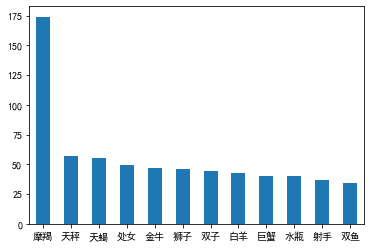

In [8]:
data_constellatoty['星座'].value_counts().plot(kind='bar',rot=0)
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.show() 

        统计结果显示，原始数据集666位UP填写了自己的生日信息，整天来看，摩羯座UP主数量最多，高达174人，占比达到26%。民间传说摩羯座是十二星座中最有耐心，为事最小心、也是最善良的星座。他们做事脚踏实地，也比较固执，不达目的是不会放手的。他们的忍耐力也是出奇的强大，同时也非常勤奋。结合民间星座理论和上述数据，可以得出以下结论：想要成为一个小有成就的UP主，主要还是要踏实肯干，奋力“肝”内容。

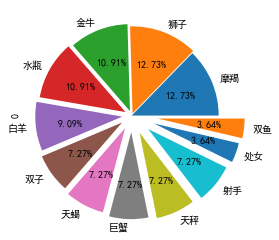

原始数据集中填写了星座的百大UP主共有55位


In [9]:
#基于以上结论，继续探究被评选为2020年百大的UP主分别属于什么星座。
list_baixing=[]
baidaxing=0
for i in range(len(data_constellatoty)):
    if data_constellatoty['是否为2020年百大UP主'][i]==1:
        list_baixing.append(data_constellatoty['星座'][i])
        baidaxing+=1
data1=pd.DataFrame(list_baixing)
data1[0].value_counts().plot(kind='pie',autopct='%1.2f%%',explode=np.linspace(0,0.3,12))
plt.show() 
print('原始数据集中填写了星座的百大UP主共有%d位'%(baidaxing))

        筛选结果显示，原始数据集中填写出生日期的百大UP主共有55位，其中摩羯、狮子、水瓶、金牛四大星座人数最多，双鱼，处女两座占比最少。结合民间星座理论，用四大星座象征词形容一位百大UP主：
<div style="text-align:center"><span style="font-size:1em;"> 
<font color=black size=3 face=雅黑>他是一名脚踏实地、充满自信、求知创新并且稳健固执的内容创作者</font>
</span> </div>

#### (2)转化数据数据分析

In [10]:
baida_zongfensi=0
baida_zongtougao=0
baida_zongguanzhu=0
baida_zongbofang=0
baida_zonghuozan=0
nonbaida_zongguanzhu=0
nonbaida_zongfensi=0
nonbaida_zongtougao=0
nonbaida_zongbofang=0
nonbaida_zonghuozan=0
for i in range(len(data)):
    if data['是否为2020年百大UP主'][i]==1:
        baida_zongguanzhu+=data['关注'][i]
        baida_zongfensi+=float(data['粉丝'][i].split(sep='万')[0])
        baida_zongtougao+=data['投稿'][i]
        baida_zonghuozan+=float(data['获赞'][i].split(sep='万')[0])
        if '亿' in data['播放'][i]:
            baida_zongbofang+=float(data['播放'][i].split(sep='亿')[0])*10000
        else:
            baida_zongbofang+=float(data['播放'][i].split(sep='万')[0])
    else:
        nonbaida_zongguanzhu+=data['关注'][i]
        nonbaida_zongfensi+=float(data['粉丝'][i].split(sep='万')[0])
        nonbaida_zongtougao+=data['投稿'][i]
        nonbaida_zonghuozan+=float(data['获赞'][i].split(sep='万')[0])
        if '亿' in data['播放'][i]:
            nonbaida_zongbofang+=float(data['播放'][i].split(sep='亿')[0])*10000
        else:
            nonbaida_zongbofang+=float(data['播放'][i].split(sep='万')[0])
print('原始数据集中的百大UP主平均每位关注{a:.2f}位UP主拥有粉丝数约为{b:.2f}万'.format(a=baida_zongguanzhu/82,b=baida_zongfensi/82))
print('原始数据集中非百大UP主平均每位关注{a:.2f}位UP主拥有粉丝数约为{b:.2f}万'.format(a=nonbaida_zongguanzhu/883,b=nonbaida_zongfensi/883))
print('原始数据集中的百大UP主平均投稿次数约为{a:.2f}次,平均每份投稿播放{b:.2f}万次，每{c:.2f}次播放获赞一枚'.format(a=baida_zongtougao/82,b=baida_zongbofang/baida_zongtougao,c=baida_zongbofang/baida_zonghuozan))
print('原始数据集中非百大UP主平均投稿次数数约为{a:.2f}次,平均每份投稿播放{b:.2f}万次，每{c:.2f}次播放获赞一枚'.format(a=nonbaida_zongtougao/883,b=nonbaida_zongbofang/nonbaida_zongtougao,c=nonbaida_zongbofang/nonbaida_zonghuozan))

原始数据集中的百大UP主平均每位关注121.06位UP主拥有粉丝数约为340.17万
原始数据集中非百大UP主平均每位关注115.90位UP主拥有粉丝数约为78.22万
原始数据集中的百大UP主平均投稿次数约为216.65次,平均每份投稿播放124.50万次，每16.11次播放获赞一枚
原始数据集中非百大UP主平均投稿次数数约为191.17次,平均每份投稿播放35.12万次，每18.56次播放获赞一枚


        经过简单的迭代计算，我们发现百大UP主与非百大UP主最显著的区别在于粉丝基数和平均播放量上。哔哩哔哩平台上的视频约每17次播放获得一次点赞，而粉丝基数的差别导致每份投稿播放量具有明显差别，基于以上数据，UP主若想要通过内容创作获得更多收益就要求其可以收获更多粉丝，而获得粉丝的重要方式是内容的不断创新。